In [1]:
# Install required module (if not exists)
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import required libraries in this lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Datascience Lab 10**

In [3]:
# Data preperation
df_titanic = pd.read_csv('Titanic.csv', index_col=0) # load the csv file
df_titanic = df_titanic[df_titanic['PClass'] != '*'] # clear the abnormal data from PClass
df_titanic = df_titanic.dropna() # drop NA rows for cleaner data

df_bluejay = pd.read_csv('blue_jays.csv', index_col=0) # load the csv file

## Lab 10-1: Violin plot (1 point)

For this assignment, you will be working with the `Titanic.csv` dataset already loaded into a DataFrame object called `df`. 

* You need to create a violin plot that displays the distribution of ages for men and women in each class of the Titanic passengers.
* Split the violin plot by sex, use the `split` parameter.
* Draw quartile lines inside each half of the plot using the `inner` parameter.
* Change the bandwidth parameter `bw` for showing the distribtuion of the ages in more detail.
* Finally, Limit the range of the plot, by removing the tails of the plot beyond the range of the data. (use `cut` parameter)

On top of that, draw the title of the chart as `Titanic Passengers by Class and Sex`

### Reference
* https://seaborn.pydata.org/examples/grouped_violinplots.html
* https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

In [4]:
# USE df_titanic in this practice.
df_titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


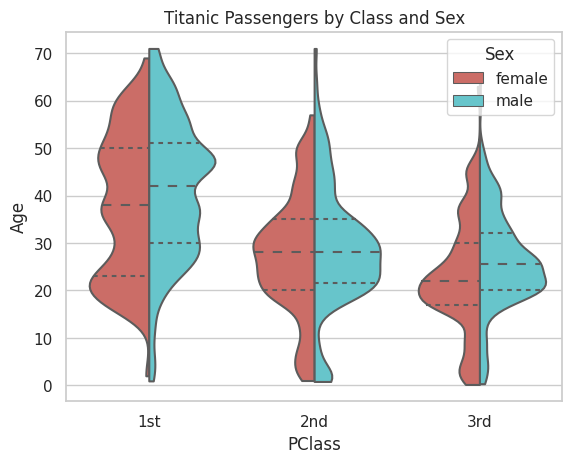

In [5]:
### -------- LAB 10-1 -------- ###

# Draw a violin plot, following the instructions above
sns.set(style="whitegrid")
sns.violinplot(x="PClass", y="Age", hue="Sex", data=df_titanic, split=True, inner="quart", bw=0.2, cut=0, palette='hls')

# Set the title of the graph
plt.title("Titanic Passengers by Class and Sex")


plt.show()

## Lab 10-2: Emprical Cumulative Distribution Function

### Task
We want to draw the weight (=`Mass`) distribution of male and female bluejays.

Using the `ecdfplot`, try drawing the ecdf plot just like the answer provided.

### Reference
* https://seaborn.pydata.org/generated/seaborn.ecdfplot.html

In [6]:
# USE df_bluejay in this practice.
df_bluejay.head()

,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1


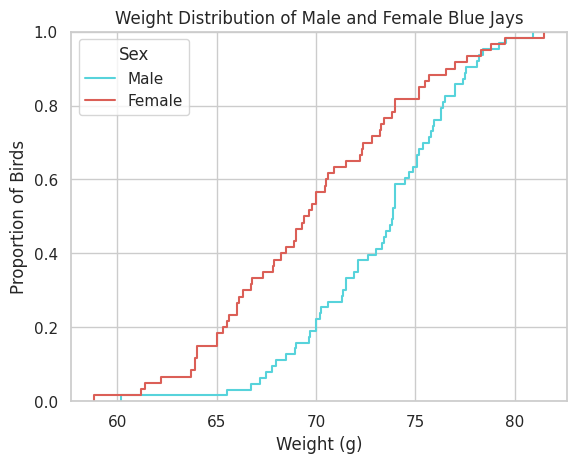

In [7]:
### -------- LAB 10-2 START -------- ###
sns.set(style="whitegrid")

sns.ecdfplot(data=df_bluejay, x="Mass", hue="Sex", stat="proportion", complementary=False, palette='hls')

plt.title("Weight Distribution of Male and Female Blue Jays")
plt.xlabel("Weight (g)")
plt.ylabel("Proportion of Birds")

plt.legend(title="Sex", labels=["Male", "Female"])


plt.show()

ANSWER THE FOLLOWING QUESTION AS WELL:

By looking at the ECDF plot above:
1) How's the mass difference between male/female bluejays? Which sex is heavier? 
  * YOUR ANSWER: I think male bluejays are heavier than the female.

2) What's the median mass of male/female bluejays? (answer by just looking at the graph)
  * YOUR ANSWER: Male: 75g   /  Female: 70g

`### -------- LAB 10-2 END -------- ###`

## Lab 10-3: Visualization of Ratio

You're asked to draw two different graphs that displays the proportion of the `PClass` in `df_titanic` dataframe from the Lab 10-1.

Using the following functions, generate the pie chart provided as the answer.

### Reference
* https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html
* https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.pie.html

In [8]:
# USE df_titanic in this practice.
df_titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


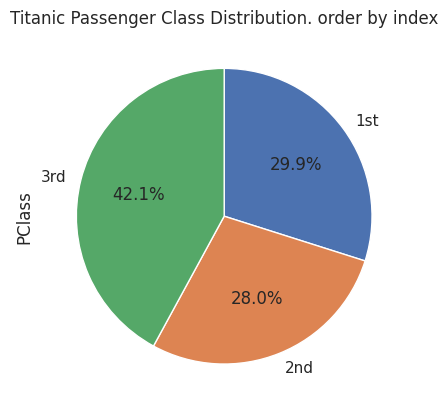

In [9]:
### -------- LAB 10-3 START -------- ###

# Make a new series object `class_counts`, which counts the number of passengers in each class.
# Use value_counts() function
# Sort the `class_counts` by index.
class_counts = df_titanic["PClass"].value_counts().sort_index()


# Create a pie chart of the class_counts, using Series.plot.pie() function
# Note: you can change the starting point of the pie chart by setting `startangle` parameter
class_counts.plot.pie(autopct="%1.1f%%", startangle=90, counterclock = False)
# 퍼센트를 없애고 싶다면,autopct="%1.1f%%" 제거

# Add a title to the plot
plt.title("Titanic Passenger Class Distribution. order by index")

# Show the plot
plt.show()

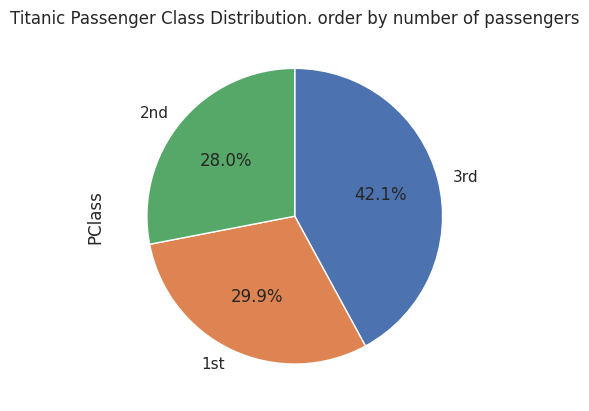

In [10]:
# Now, redraw the pie chart, in this case, in the order of number of passengers.
class_counts = df_titanic["PClass"].value_counts()
class_counts.plot.pie(autopct="%1.1f%%", startangle=90, counterclock = False)
# 퍼센트를 없애고 싶다면,autopct="%1.1f%%" 제거

# Add a title to the plot
plt.title("Titanic Passenger Class Distribution. order by number of passengers")

# Show the plot
plt.show()
### -------- LAB 10-3 END -------- ###

## Lab 10-4: Scatter plot bluejays grouped by sex

Draw a scatter plot that displays the relationship between the mass and skull length of Bluejay.

* Have the x-axis and y-axis with units, like `Mass (g)` andd `Skull (mm)`.
* Show the male/female bluejays in different colors (use `hue` parameter)
* Set the plot title appropriately

### Reference
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [11]:
# USE df_bluejay in this practice.
df_bluejay.head()

,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1


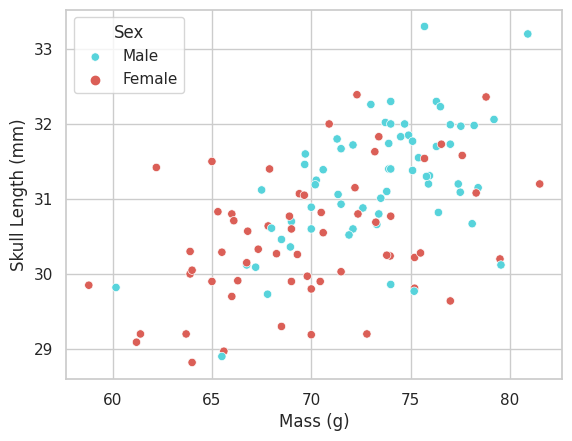

In [12]:
### -------- LAB 10-4 START -------- ###
# Create a scatter plot using seaborn
sns.scatterplot(data=df_bluejay, x="Mass", y="Skull", hue="Sex", palette='hls')

# Set the x and y axis labels
plt.xlabel("Mass (g)")
plt.ylabel("Skull Length (mm)")
plt.legend(title="Sex", labels=["Male", "Female"])

plt.show()
### -------- LAB 10-4 END ---------- ###